In [10]:
from numpy import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


n_examples = 1000

citationIds = ['citation%s'%id for id in range(n_examples)]
latitudes =  [39.299236 + random.rand() - 0.5 for _ in range(n_examples)]
longitudes = [-76.609383 + random.rand() -0.5 for _ in range(n_examples)]
political_neigh = random.choice(['North', 'Northeast', 'East', 'Southeast', 
                                 'South', 'Southwest', 'West', 'Northwest', 'Central'],n_examples)

bmoreZips = [21201, 21202, 21203, 21205, 21206, 
             21209, 21210, 21211, 21212, 21213, 
             21214, 21215, 21216, 21217, 21218, 
             21223, 21224, 21229, 21230, 21231, 
             21233, 21235, 21239, 21241, 21251, 
             21263, 21264, 21270, 21273, 21275, 
             21278, 21279, 21280, 21281, 21287, 
             21288, 21289, 21290, 21297, 21298]
zipcodes = [str(random.choice(bmoreZips)) for _ in range(n_examples)]

current_balance = random.randint(75,150,n_examples)


In [11]:
df = pd.DataFrame({'citationId':citationIds,
                   'latitude':latitudes,
                   'longitude':longitudes,
                  'political_neighborhood':political_neigh,
                  'zipcode':zipcodes,
                  'balance':current_balance})
df.head()

,balance,citationId,latitude,longitude,political_neighborhood,zipcode
0,100,citation0,39.296687,-76.376014,Northwest,21264
1,98,citation1,39.258185,-76.794852,South,21230
2,76,citation2,39.360320,-76.264458,Central,21275
3,120,citation3,38.821104,-76.367387,Central,21233
4,131,citation4,39.343000,-76.381391,North,21263


In [61]:
pn_df = df.groupby('political_neighborhood',as_index=False).agg({'balance':['mean','sum'],'citationId':'count'})
pn_df.columns = ["_".join(x) for x in pn_df.columns.ravel()]
pn_df = pn_df.sort_values('balance_mean',ascending=False)
pn_df.head()

,political_neighborhood_,balance_mean,balance_sum,citationId_count
1,East,113.649485,11024,97
6,Southeast,112.631579,10700,95
0,Central,112.530435,12941,115
8,West,111.750000,12516,112
4,Northwest,111.533898,13161,118


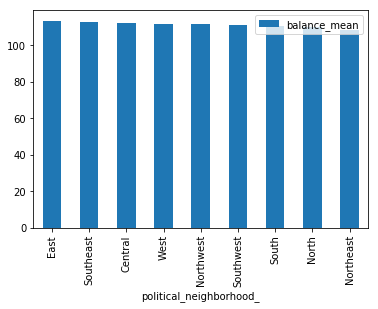

In [53]:
pn_df.plot(x='political_neighborhood_', y='balance_mean', kind='bar')

In [62]:
zip_df = df.groupby('zipcode',as_index=False).agg({'balance':['mean','sum'],'citationId':'count'})
zip_df.columns = ["_".join(x) for x in zip_df.columns.ravel()]
zip_df = zip_df.sort_values('balance_mean',ascending=False)
zip_df.head()

,zipcode_,balance_mean,balance_sum,citationId_count
23,21241,118.333333,2130,18
28,21273,117.956522,2713,23
35,21288,117.923077,1533,13
33,21281,117.833333,4242,36
37,21290,117.421053,2231,19


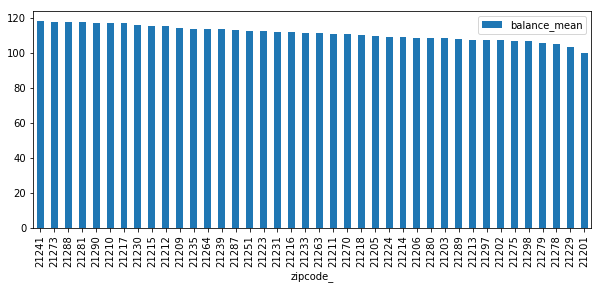

In [60]:
zip_df.plot(x='zipcode_', y='balance_mean', kind='bar',figsize=(10,4))